# Churn Prediction

In [1]:
from IPython.display import Image
Image(url="./churn_pred.png", height=500)

It's a binary classification, will it churn or will it stays.
It will be a score between 0-1
Likelihood of churn

We should always have some data every month from people leaving the company.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# We use the transpose here, to see columns as rows, and be able to see all the values of the columns
# in a single column (easier to see)
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# cleaning up some data
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [7]:
# if we cannot convert the number we can coerce it with this specific parameter
# total charges mightve been an empty space = " ", when we 
# clened up our data, we converted some of those " " into "_", lets fix that
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [8]:
df.totalcharges = tc
df.totalcharges.isnull().sum()

11

In [9]:
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.totalcharges.isnull().sum()

0

In [11]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [12]:
df.churn = (df.churn == "yes").astype(int)

In [13]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Setting up the validation framework

60/20/20 distribution
60 for training, 20 for validation, and 20 for test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#pull up doc
train_test_split?

In [16]:
# 80/20 split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
len(df_full_train), len(df_test)

(5634, 1409)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [22]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

# EDA (Exploratory Data Analysis)

- Check missing values
- look at the target variable
- look at numerical and categorical values

In [23]:
# from the split, the indices get randomized, let's make them look pretty, just bc we can
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
# lets see how many occurrences of each value are for this variable, we can normalize it to a 0-1 split
# the 1's are what is effectively called the churn rate.
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [25]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

the reason the above code works, is because mean is solved by taking the sum of items, and dividing them by the number of items in the list
`[1, 0, 1, 0, 0, 0]` is effectively `(1+1) / 6`

In [26]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [27]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [28]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod' ]

In [29]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Importance

In [30]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [31]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [32]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [33]:
global_churn_rate

0.26996805111821087

In [34]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [35]:
partner_yes = df_full_train[df_full_train.partner == 'yes'].churn.mean()
partner_yes

0.20503330866025166

In [36]:
partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
partner_no

0.3298090040927694

Feature Important

- Difference:
    - Global - group > 0 less likely
    - Global - group < 0 more likely

In [37]:
partner_no / global_churn_rate 

1.2216593879412643

In [38]:
partner_yes / global_churn_rate

0.7594724924338315

Risk Ratio

Risk = Group / global churn rate

`> 1: more likely to churn`
`< 1: less likely to churn`

In [39]:
from IPython.display import Image
Image(url="./churn_rate.png", height=500)

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM 
    data
GROUP BY
    gender;
```

In [40]:
from IPython.display import display

In [41]:

# Lets us see the relationship between the features, and impact on the churn rate. 
for c in categorical:
    # We are grouping by category
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    # adding the diff
    df_group['diff'] = df_group['mean'] - global_churn_rate
    # also adding the risk
    df_group['risk'] = df_group['mean'] / global_churn_rate
    # new df
    display(df_group)
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature Importance: Mutual Information
How much do we know of `churn` by looking at something like `contract`

In [42]:
from sklearn.metrics import mutual_info_score

# This is extremely important because this tells us how much one variable impacts another one
# in this case the churn rate.
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [43]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [44]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [45]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [46]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature Importance: Correlation

How about numerical columns

(Pearson Correlation Coefficient)

x --- y = r

-1 <= r <= 1

LOW(Rarely):
0.0 -0.2
0.0 0.2

MODERATE(Sometimes):
-0.2 -0.5
0.2 0.5

STRONG(Often/Always):
-0.6 -1.0
0.6 1.0

y E {0,1}

x E |R 

x = TENURE -> 0 - 72

y = CHURN -> {0,1}


Positive would mean: More Tenure -> Higher Churn Rate
Negative would mean: More Tenure -> Lower Churn Rate

In [49]:
df_full_train[numerical].corrwith(df_full_train.churn)

# We can interpret these values such as:
# Tenure: The longer a customer is with us, the less likely they are to churn
# Monthly Charges: The higher the monthly charges are, the more likely they are to churn
# Total Charges: The more people pay, the less likely they are to churn

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [50]:
df_full_train[df_full_train['tenure'] <= 2].churn.mean()

0.5953420669577875

In [51]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [52]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17634908339788277

In [53]:
from IPython.display import Image
Image(url="./correlation.png", height=500)

In [54]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [55]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [56]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

In [57]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One Hot Encoding

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [60]:
# Instantiating a new object, we use sparse false, because we want a numpy array back
dv = DictVectorizer(sparse=False)

In [61]:
# fit the dictvectorizer to learn about the structure of our dataframe
X_train = dv.fit_transform(train_dicts)

In [62]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [63]:
X_val = dv.transform(val_dicts) 

# Logistic Regression

In [64]:
from IPython.display import Image
Image(url="./logistic_regression.png", height=500)

g(xi) -> 0-1

Probability of xi belonging to the positive class

Using Sigmoid function to get a number between 0-1 from linear regression formula

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [66]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [67]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

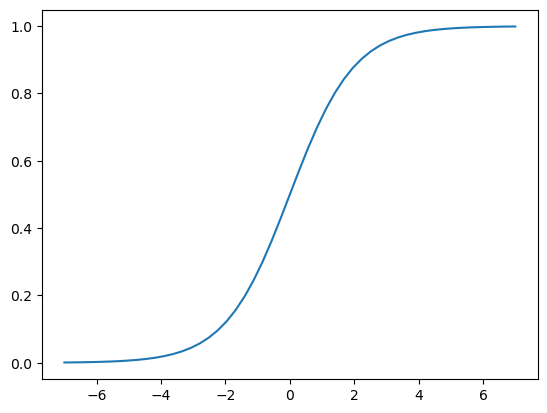

In [68]:
plt.plot(z, sigmoid(z))

# Training logistic regression w scikit learn 

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [71]:
model.intercept_[0]

-0.10903521054753158

In [72]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [73]:
y_pred = (model.predict_proba(X_val))[:, 1]

In [74]:
# True means we think they are chruning
churn_decision = y_pred >= 0.5

In [75]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [76]:
(y_val == churn_decision).mean()

0.8034066713981547

In [77]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [78]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [79]:
df_pred.correct.mean()

0.8034066713981547

# Interpreting the model

In [80]:
small = ['contract', 'tenure', 'monthlycharges']

In [81]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [82]:
dics_train_small = df_train[small].to_dict(orient='records')
dics_val_small = df_val[small].to_dict(orient='records')

In [83]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dics_train_small)

DictVectorizer(sparse=False)

In [84]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [85]:
X_train_small = dv_small.transform(dics_train_small)

In [86]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [87]:
w0 = model_small.intercept_[0]
w0

-2.476775660276911

In [88]:
w = model_small.coef_[0]

In [89]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

# for costumer = month to month, 5 month tenure, 50$ monthly charges

-2.47 (bias) + 0.97 (month to month) + 50*0.027(monthlycharges) + 5 * (-0.036) = -0.33

In [90]:
sigmoid(-0.33)

0.4182406231581638